# 3. Visualization of Saliency Vectors, projected on 2D

In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import metadata as m
import constants as C

In [13]:
%cd ..
from sage.data import UKBDataset
from sage.data.adni import ADNIBinary
ukb_test_ds = UKBDataset(mode="test")
adni_test_ds = ADNIBinary(mode="test")
y = ukb_test_ds.labels.age.values
%cd RQ

/home/daehyun/.conda/envs/age/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
INFO:sage.data.dataloader:Setting up UKBiobank Dataset
INFO:sage.data.dataloader:Total 3029 files of test exist
INFO:sage.data.dataloader:Setting up ADNI-Binary Dataset


/home/daehyun/codespace/brain-age-prediction


FileNotFoundError: [Errno 2] No such file or directory: 'adni/adni_screen_labels_Sept11_test15_2024.csv'

In [4]:
INTERPS = m.load_interps()

Loop over XAI    : ['gradxinput', 'gcam_avg', 'gbp', 'smooth_gbp', 'smooth_grad', 'ggcam_avg', 'deeplift', 'ig']
Loop over MODELS : ['resnet10', 'resnet18', 'resnet34', 'convnext-tiny', 'convnext-small', 'convnext-base', 'densenet121', 'densenet169', 'densenet264d']
Loop over seeds  : range(42, 52)


Runtime Divide invalid value encountered in divide: convnext-base-45 | gcam_avg
Runtime Divide invalid value encountered in divide: convnext-base-47 | gcam_avg
Runtime Divide invalid value encountered in divide: convnext-base-50 | gcam_avg
Runtime Divide invalid value encountered in divide: convnext-base-45 | ggcam_avg
Runtime Divide invalid value encountered in divide: convnext-base-47 | ggcam_avg
Runtime Divide invalid value encountered in divide: convnext-base-50 | ggcam_avg


In [7]:
def plot_tsne_hue(xai_key: str, model_key: str, index: int = 0, cmap="bwr", ax=None, fig=None):
    features = INTERPS[xai_key][model_key][index]
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(features)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y, cmap=cmap,
                    alpha=0.7, s=6, vmin=min(y), vmax=max(y))
    ax.set_title(f"{C.XAI_METHODS_MAPPER.get(xai_key, xai_key)}")
    ax.axis(False)
    ax.grid(False)
    return sc

### Biobank

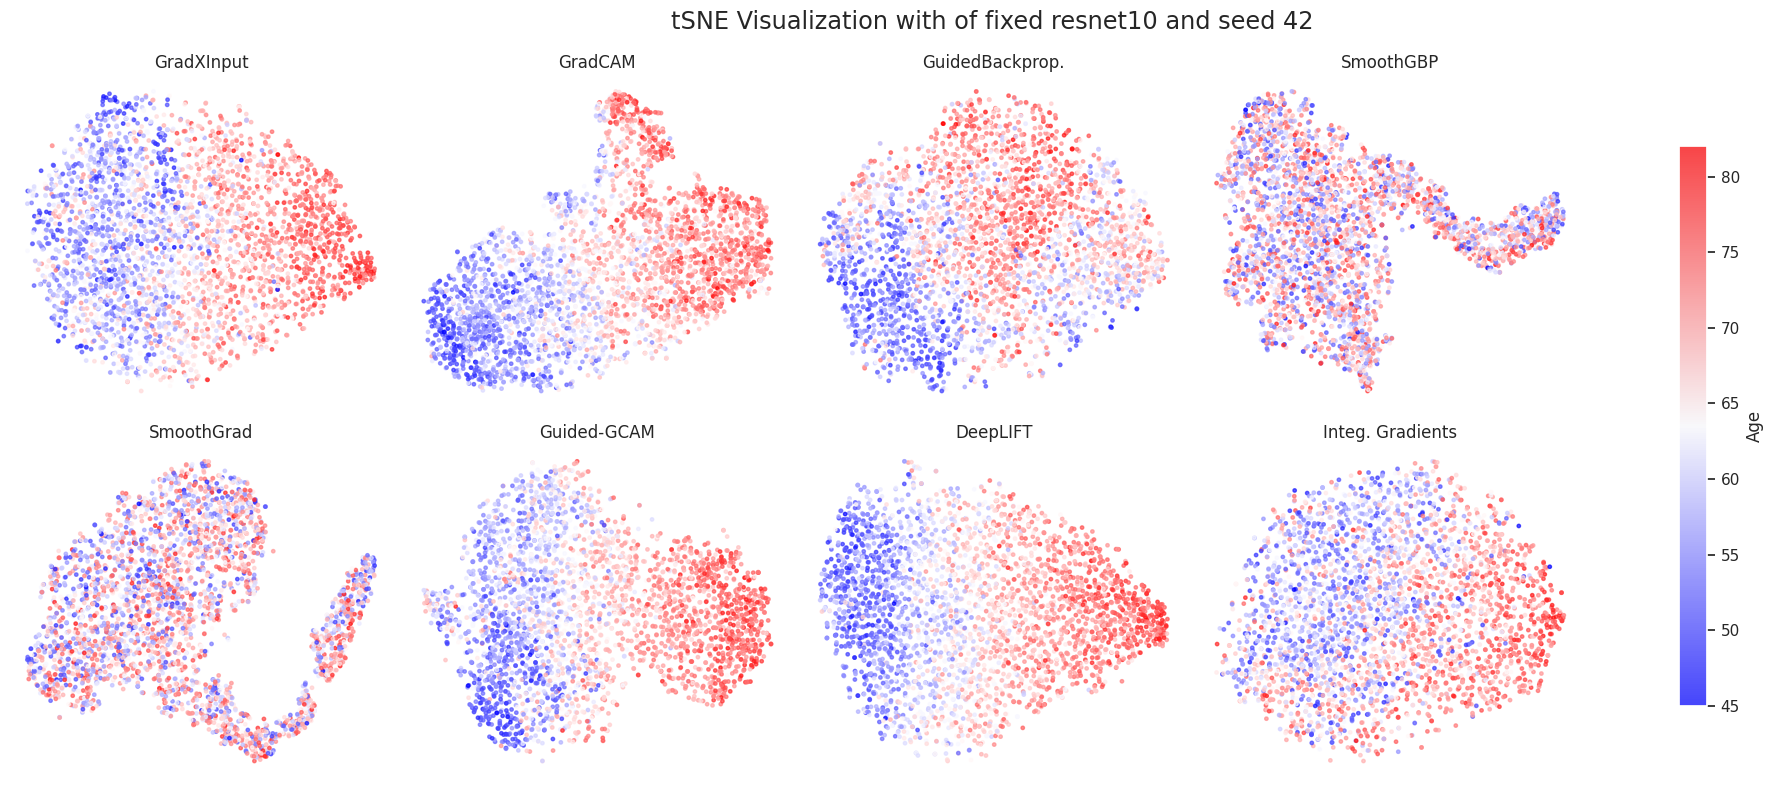

In [6]:
model_key, index, cmap = "resnet10", 0, "bwr"

fig, ax = plt.subplots(figsize=(20, 8), nrows=2, ncols=4)
for idx, xai_method in enumerate(C.XAI_METHODS):
    _ax = ax[idx // 4, idx % 4]
    sc = plot_tsne_hue(xai_key=xai_method, model_key=model_key, index=index, cmap=cmap, ax=_ax, fig=fig)
fig.suptitle(f"tSNE Visualization with of fixed {model_key} and seed {index+42}", size="x-large")
fig.tight_layout()
cbar = fig.colorbar(sc, ax=ax.ravel().tolist(), orientation='vertical', label="Age", shrink=0.8)

In [ ]:
model_key, index, cmap = "resnet18", 1, "bwr"

fig, ax = plt.subplots(figsize=(20, 8), nrows=2, ncols=4)
for idx, xai_method in enumerate(C.XAI_METHODS):
    _ax = ax[idx // 4, idx % 4]
    sc = plot_tsne_hue(xai_key=xai_method, model_key=model_key, index=index, cmap=cmap, ax=_ax, fig=fig)
fig.suptitle(f"tSNE Visualization with of fixed {model_key} and seed {index+42}", size="x-large")
fig.tight_layout()
cbar = fig.colorbar(sc, ax=ax.ravel().tolist(), orientation='vertical', label="Age", shrink=0.8)

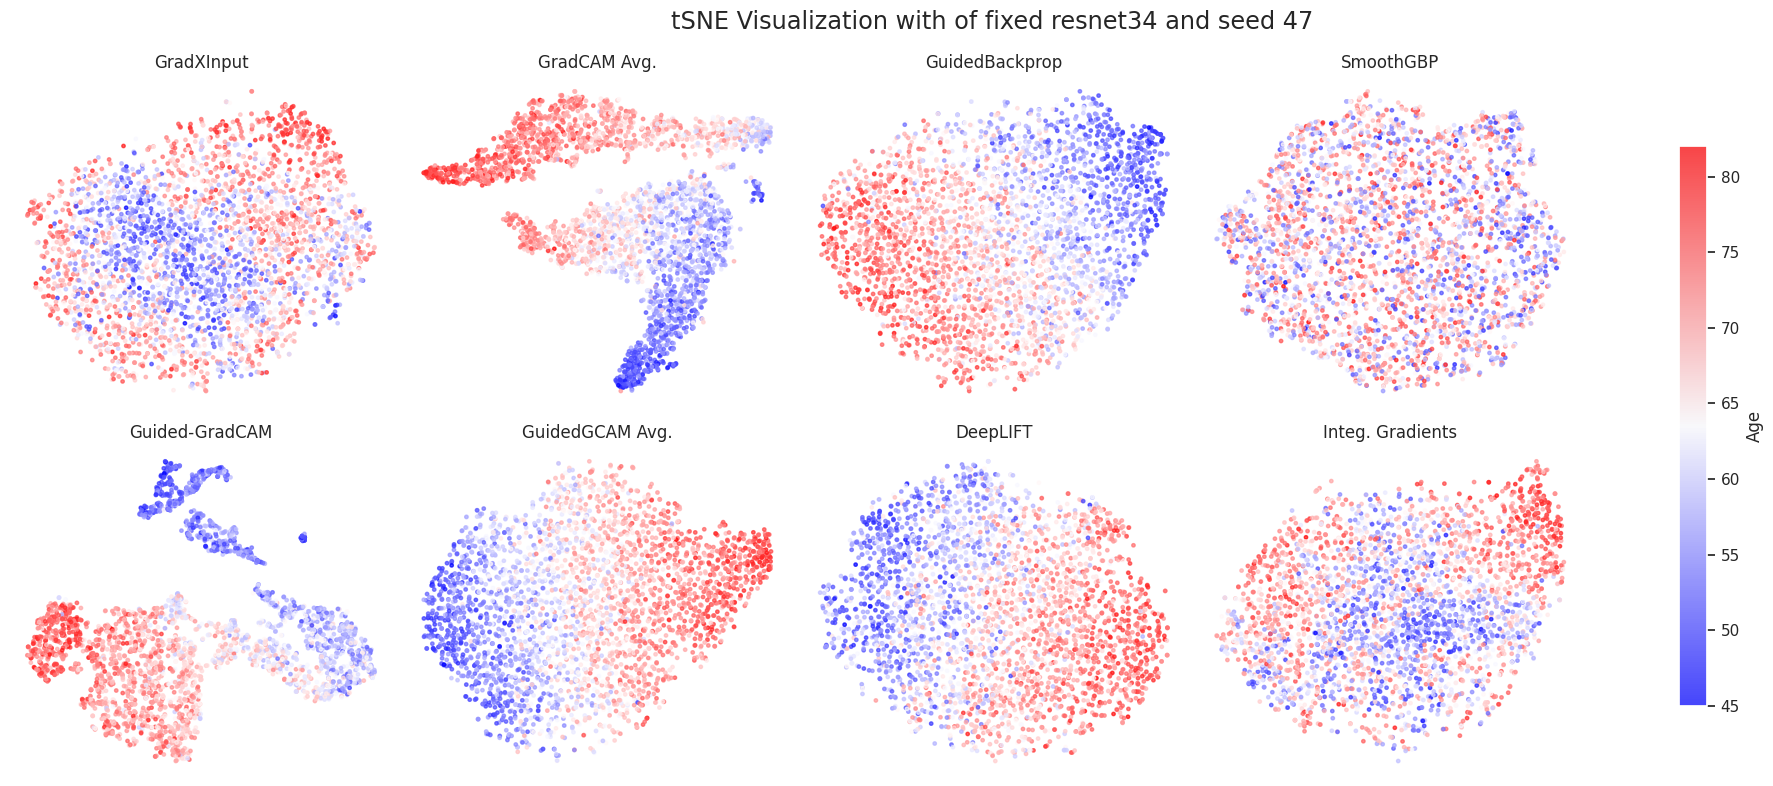

In [7]:
model_key, index, cmap = "resnet34", 5, "bwr"

fig, ax = plt.subplots(figsize=(20, 8), nrows=2, ncols=4)
for idx, xai_method in enumerate(C.XAI_METHODS):
    _ax = ax[idx // 4, idx % 4]
    sc = plot_tsne_hue(xai_key=xai_method, model_key=model_key, index=index, cmap=cmap, ax=_ax, fig=fig)
fig.suptitle(f"tSNE Visualization with of fixed {model_key} and seed {index+42}", size="x-large")
fig.tight_layout()
cbar = fig.colorbar(sc, ax=ax.ravel().tolist(), orientation='vertical', label="Age", shrink=0.8)

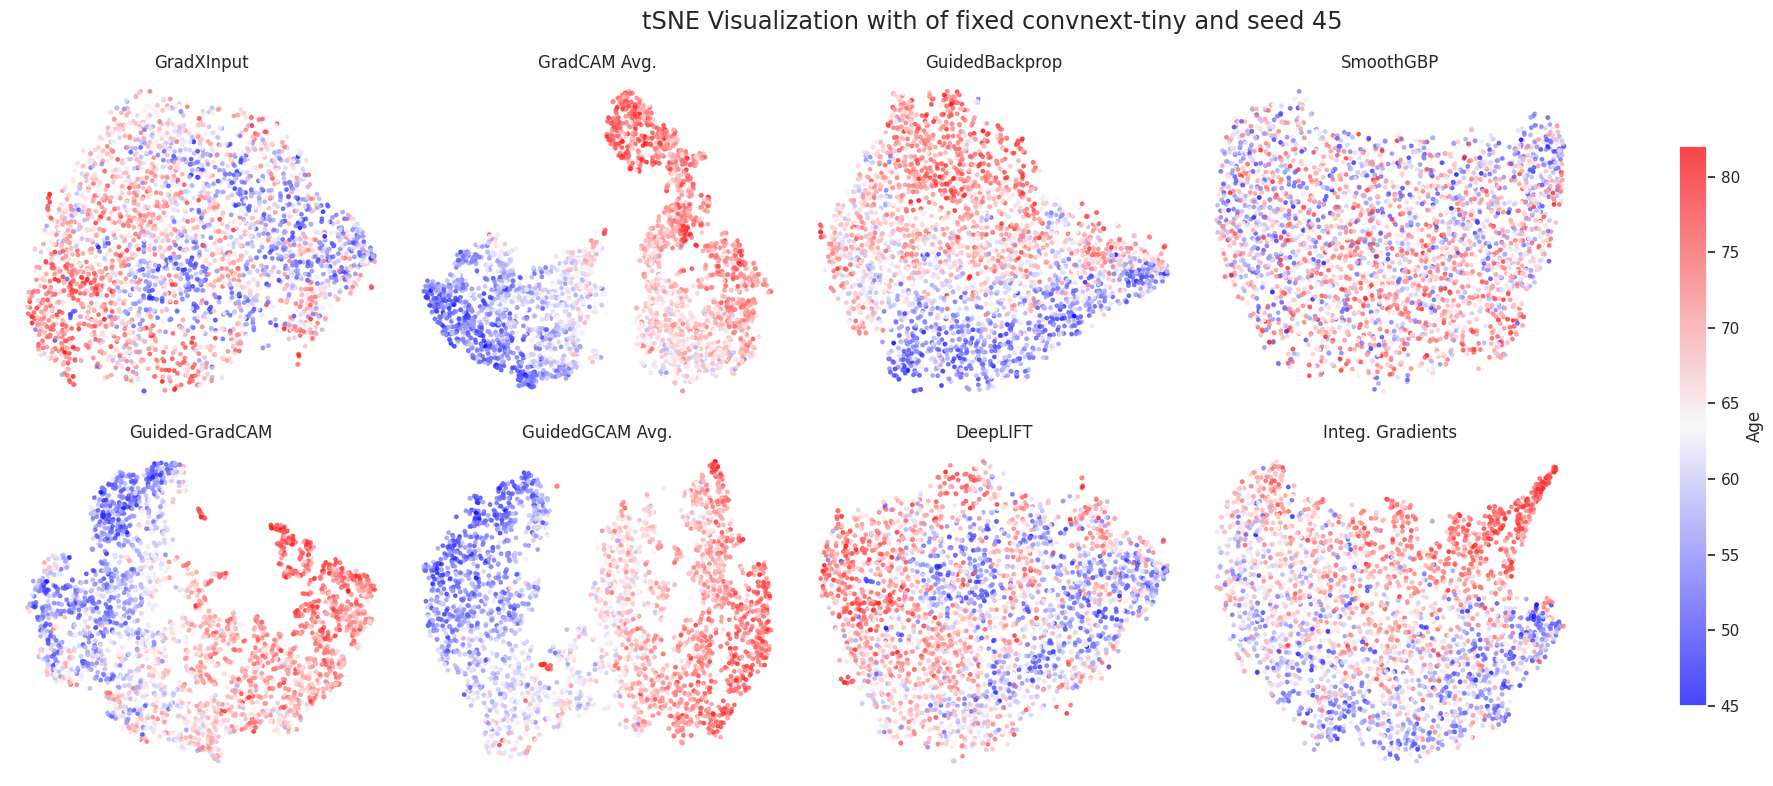

In [5]:
model_key, index, cmap = "convnext-tiny", 3, "bwr"

fig, ax = plt.subplots(figsize=(20, 8), nrows=2, ncols=4)
for idx, xai_method in enumerate(C.XAI_METHODS):
    _ax = ax[idx // 4, idx % 4]
    sc = plot_tsne_hue(xai_key=xai_method, model_key=model_key, index=index, cmap=cmap, ax=_ax, fig=fig)
fig.suptitle(f"tSNE Visualization with of fixed {model_key} and seed {index+42}", size="x-large")
fig.tight_layout()
cbar = fig.colorbar(sc, ax=ax.ravel().tolist(), orientation='vertical', label="Age", shrink=0.8)

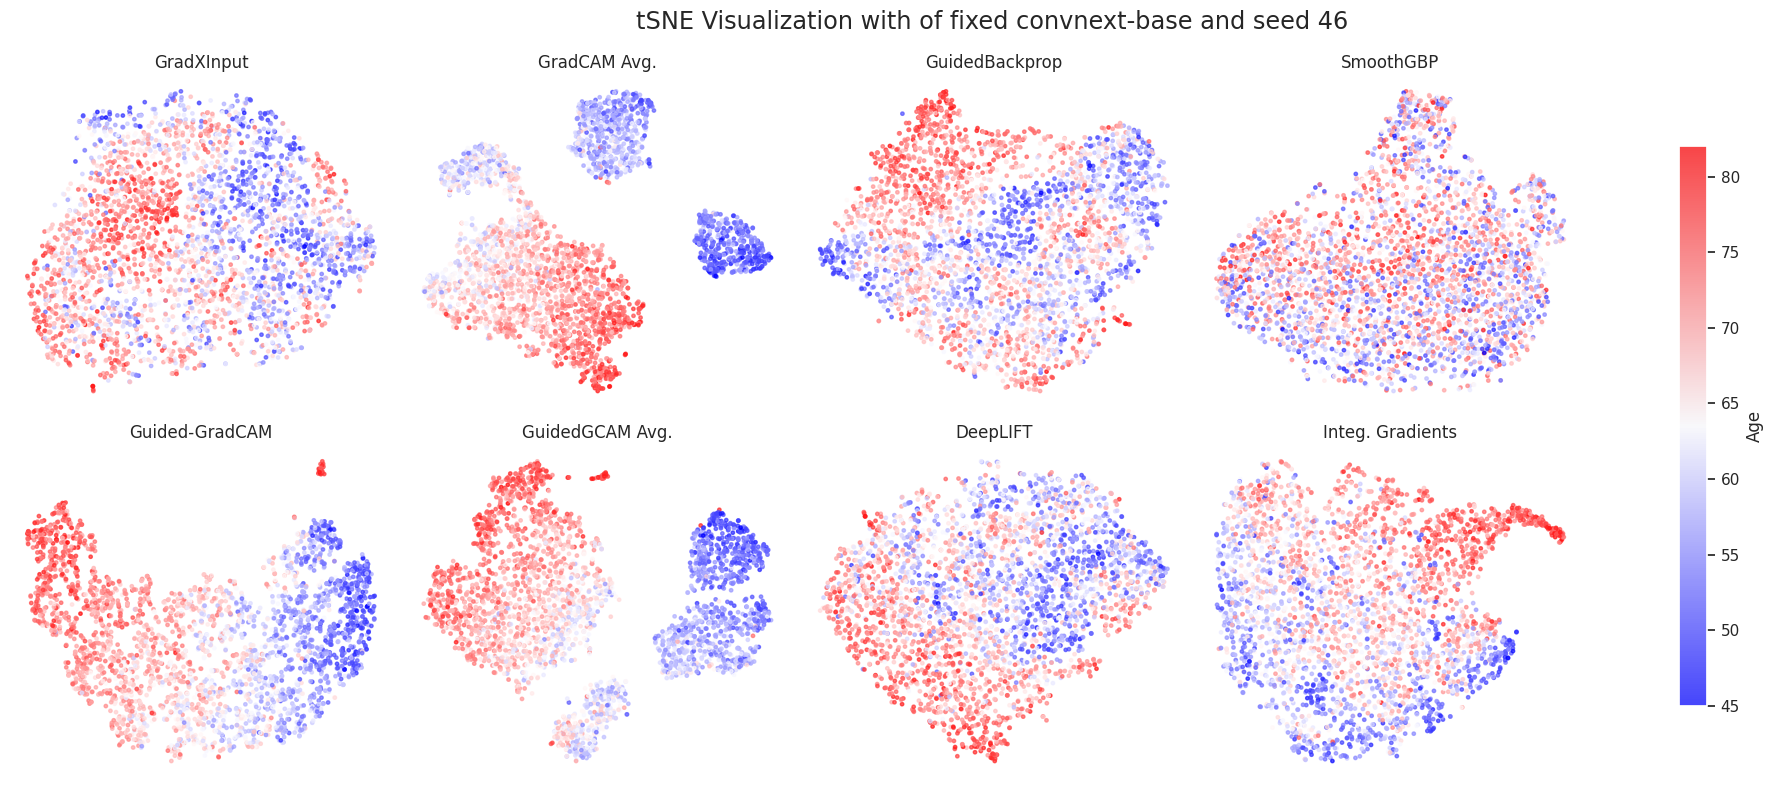

In [6]:
model_key, index, cmap = "convnext-base", 4, "bwr"

fig, ax = plt.subplots(figsize=(20, 8), nrows=2, ncols=4)
for idx, xai_method in enumerate(C.XAI_METHODS):
    _ax = ax[idx // 4, idx % 4]
    sc = plot_tsne_hue(xai_key=xai_method, model_key=model_key, index=index, cmap=cmap, ax=_ax, fig=fig)
fig.suptitle(f"tSNE Visualization with of fixed {model_key} and seed {index+42}", size="x-large")
fig.tight_layout()
cbar = fig.colorbar(sc, ax=ax.ravel().tolist(), orientation='vertical', label="Age", shrink=0.8)

## ADNI

In [5]:
INTERPS = m.load_interps(is_cls=True, base_dir=C.ADNI_WEIGHT_DIR)

Loop over XAI    : ['gradxinput', 'gcam_avg', 'gbp', 'smooth_gbp', 'smooth_grad', 'ggcam_avg', 'deeplift', 'ig']
Loop over MODELS : ['resnet10', 'resnet18', 'resnet34', 'convnext-tiny', 'convnext-small', 'convnext-base', 'densenet121', 'densenet169', 'densenet264d']
Loop over seeds  : range(42, 52)
Runtime Divide invalid value encountered in divide: resnet18-binary-49 | ggcam_avg


In [11]:
def plot_tsne_hue(xai_key: str, model_key: str, index: int = 0, cmap="bwr", ax=None, fig=None):
    features = INTERPS[xai_key][model_key][index]
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(features)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap=cmap,
                    alpha=0.7, s=6)
    ax.set_title(f"{C.XAI_METHODS_MAPPER.get(xai_key, xai_key)}")
    ax.axis(False)
    ax.grid(False)
    return sc

/tmp/ipykernel_323991/1534719424.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap=cmap,
/tmp/ipykernel_323991/1534719424.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap=cmap,
/tmp/ipykernel_323991/1534719424.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap=cmap,
/tmp/ipykernel_323991/1534719424.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap=cmap,
/tmp/ipykernel_323991/1534719424.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap=cmap,
/tmp/ipyke

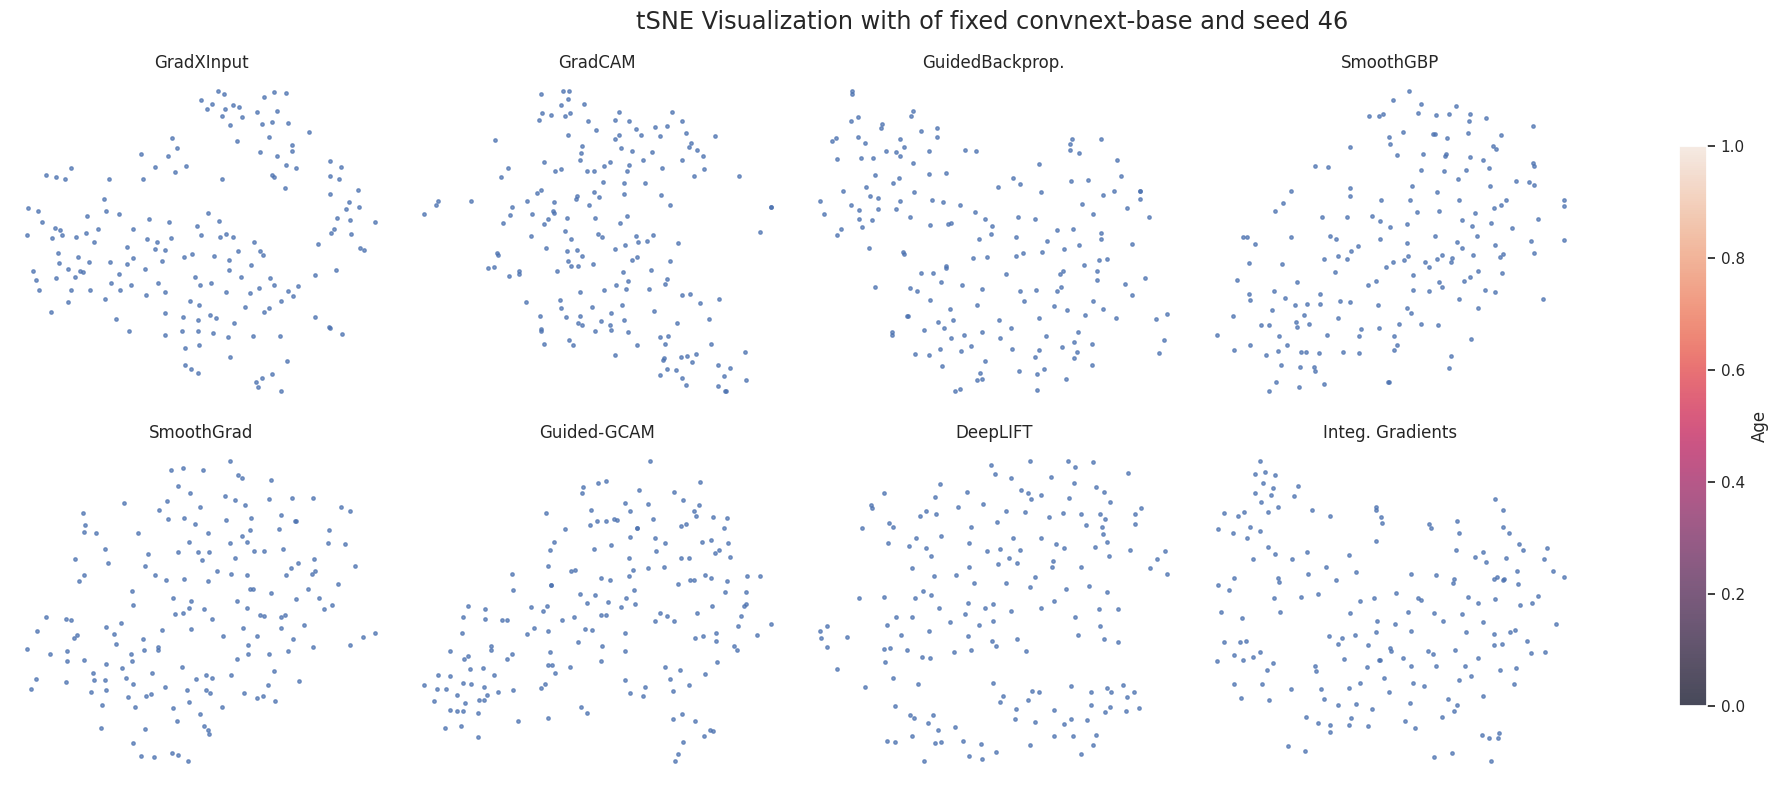

In [12]:
model_key, index, cmap = "convnext-base", 4, "bwr"

fig, ax = plt.subplots(figsize=(20, 8), nrows=2, ncols=4)
for idx, xai_method in enumerate(C.XAI_METHODS):
    _ax = ax[idx // 4, idx % 4]
    sc = plot_tsne_hue(xai_key=xai_method, model_key=model_key, index=index, cmap=cmap, ax=_ax, fig=fig)
fig.suptitle(f"tSNE Visualization with of fixed {model_key} and seed {index+42}", size="x-large")
fig.tight_layout()
cbar = fig.colorbar(sc, ax=ax.ravel().tolist(), orientation='vertical', label="Age", shrink=0.8)